# Analysis of credit card approval

## Introduction

Credit card has become one of the most popular payment method. People spend billions in the U.S. alone. Credit card debt increased almost one-hundred fold since FED started tracking the trend. In 2018 credit card debt grew by over 43 billion U.S. dollars, from 756 to 799 billions U.S. dollars.
Given such huge growth and popularity it is important to build reliable business model for institutions that provide credit card service. One of the most important questions to answer among many others is - can a credit card be issued for the applicant. This is important for both the businesses and for the applicants. If businesses start issueing cards for unreliable customers, who might bancrupt and funds will be lost. High number of such customers might hurt businesses. On the other hand if person is not able to calculate their financial capabilities or are not responsible enough to own a credit card, they might get into bigger debt than they can return. This might break people's lives, hurt families and communities. Large number of such bad customers can accumulate to significant financial losses. Credit card institution's reputation can suffer, damaging its attractability of new customers. Further, if reputation drops, many undesired consequences might follow, for example credit rating drop, interest rate increase due to lack of trust in the interbank market etc. 
Having said that and given that the credit card financing market is among the biggest in the world it is clear the answering this question is crucial for any institution that is attempting to create business in this are.
For this study I will use statistical methods to realize if there are relations between different parameters (such as age, gender, income, etc.) and decisions to issue or not the card. Later I will attempt to build a decision tree and to create a model that could be used by credit card institutions to help to answer if the card should be issued or not.

## Data

The data I will use can be found in kaggle <a href="https://www.kaggle.com/dansbecker/aer-credit-card-data" target="_blank">here</a>. This dataset was originally published alongside the 5th edition of William Greene's book Econometric Analysis. Data has 1319 rows and consists of historical data on credit card applications and decisions to issue it or to not issue. Data consists of the following columns:
<ul>
<li><strong>card:</strong> Dummy variable, 1 if application for credit card accepted, 0 if not</li>
<li><strong>reports:</strong> Number of major derogatory reports</li>
<li><strong>age:</strong> Age n years plus twelfths of a year</li>
<li><strong>income:</strong> Yearly income (divided by 10,000)</li>
<li><strong>share:</strong> Ratio of monthly credit card expenditure to yearly income</li>
<li><strong>expenditure:</strong> Average monthly credit card expenditure</li>
<li><strong>owner:</strong> 1 if owns their home, 0 if rent</li>
<li><strong>selfempl:</strong> 1 if self employed, 0 if not.</li>
<li><strong>dependents:</strong> 1 + number of dependents</li>
<li><strong>months:</strong> Months living at current address</li>
<li><strong>majorcards:</strong> Number of major credit cards held</li>
<li><strong>active:</strong> Number of active credit accounts</li>
</ul>

I will attempt to use the given features to predict the <b>card</b> feature.

## Methodology

For this study I will use statistical methods to realize if there are relations between different parameters (such as age, gender, income, etc.) and decisions to issue or not the card. Later I will attempt to build a decision tree and to create a model that could be used by credit card institutions to help to answer if the card should be issued or not.

### Get and prepare the data

###### Import libraries

In [23]:
#!conda install -c conda-forge pydotplus
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.metrics import f1_score
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

print("libs imported")

libs imported


###### Read the data

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/MindaugasPo/Coursera_Capstone/master/AER_credit_card_data.csv")
df.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


In [20]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


###### Prepare the data

In [4]:
df["card"] = df["card"].map({"yes":1,"no":0})
df["owner"] = df["owner"].map({"yes":1,"no":0})
df["selfemp"] = df["selfemp"].map({"yes":1,"no":0})

In [5]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5


### Exploratory data analysis

###### Visualize the data

First let's visualize data by age. This will allow us to understand how people are distributed by age. Also it might give as hint if data set is representative or not.
We can see that majority of people who applies for credit card are from 20 to 60 years old. Further, half of all people are between 25 and 40. This can help business to better understand their customers and perhaps make better decisions on marketing.

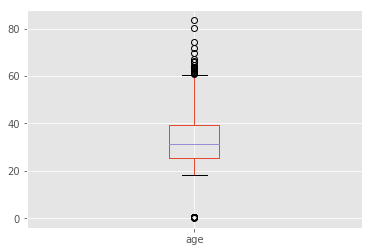

In [8]:
boxplot = df.boxplot(column=["age"])

Then let's see how people are distributed by income. Let's recap that income is provided by yearly income divided by 10,000. This plot might help us understand what market segment is usually applying for credit cards. Additionaly this can help businesses to target their marketing effort at certain group of people. 
As we can see from the plot, majority of people who applies for credit cards are people earning 60,000 or less. Which can be classified as mid to low income market segment.

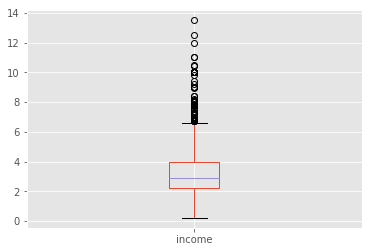

In [9]:
boxplot = df.boxplot(column=["income"])

Good indicator on how cards are used is expenditure. We could better realize how much people spend when they own a card. This can greatly help to measure risks.
Given data shows that 75% of owners spend below $ 600 a month.

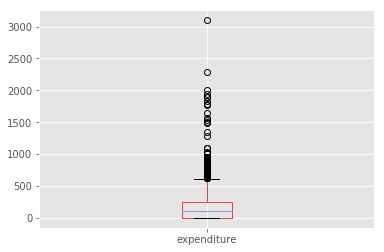

In [10]:
boxplot = df.boxplot(column=["expenditure"])

It would be useful to know not only how much people spend on average, but also, who spends how much. This can greatly impact risk calculations, and also can help to target marketing efforts to attract better customers. Let's compare how much people spend by age and by income.

First let's see how people are distributed by income and age. Correlation here could help us understand which customers can be more profitable.
As we can see the correlation is weak. It could be said that older customers earn more, but this wouldn't be a reliable measure and each customer should be considered separatelly.

Text(0.5, 1.0, 'Income by age')

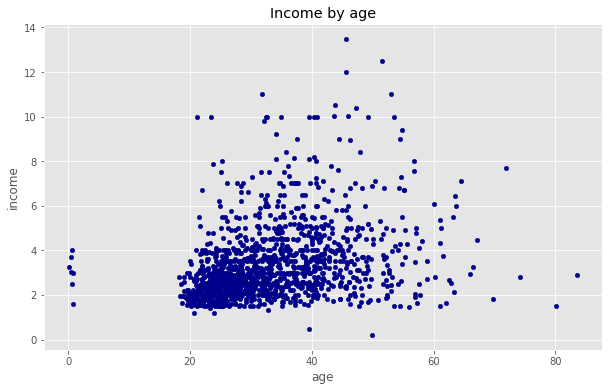

In [11]:
df.plot(kind='scatter', x='age', y='income', figsize=(10, 6), color='darkblue')
plt.title('Income by age')

Then, let's compare if there is correlation between age and expenditure. From the chart we can see that certain confidence we could onclude that younger people have more customers who spend more on average. This could possibly be related to the natural flow of people's lives - young people create families, buy and decorates homes etc. And older people have less such burdains.

Text(0.5, 1.0, 'Expenditure by age')

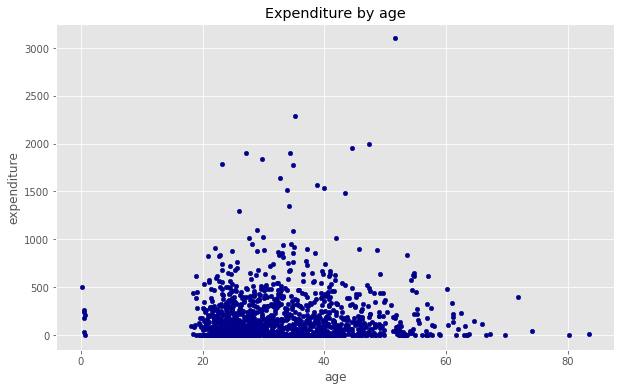

In [59]:
df.plot(kind='scatter', x='age', y='expenditure', figsize=(10, 6), color='darkblue')
plt.title('Expenditure by age')

Then, let's compare how income correlates to the expenditure. Question here is - who spends more from credit card, people who earn more or people who earn less. 
From the chart we can see that correlation again is not strong. We could conclude that people who earn less are more active credit card users. Also, group of people who earn less tend to have more individuals who spend more. 

Text(0.5, 1.0, 'Expenditure by income')

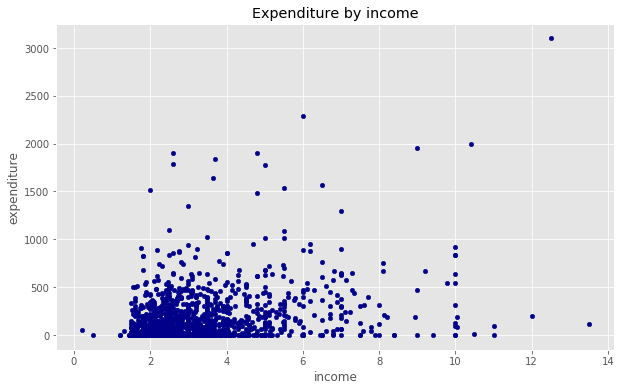

In [13]:
df.plot(kind='scatter', x='income', y='expenditure', figsize=(10, 6), color='darkblue')
plt.title('Expenditure by income')

### Create a model for predicting credit card approvals

###### Setup the decision tree

In [15]:
X = df[["reports","age","income","share","expenditure","owner","selfemp","dependents","months","majorcards","active"]]
y = df["card"]
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [16]:
cardTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
cardTree 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

###### Fit the data to the prediction tree

In [17]:
cardTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
predTree = cardTree.predict(X_testset)

In [19]:
print (predTree [0:5])
print (y_testset [0:5])

[1 1 1 1 1]
633     1
549     1
1187    1
1170    1
1000    1
Name: card, dtype: int64


###### Measure prediction accuracy

In [21]:
accuracy = metrics.accuracy_score(y_testset, predTree)
print("DecisionTrees's Accuracy: ", accuracy)

DecisionTrees's Accuracy:  0.9595959595959596


In [25]:
f1 = f1_score(predTree, y_testset)
print("F1 score: ", f1)

F1 score:  0.9735099337748344


## Results

The result of building a decision tree with the given dataset was a successful built model. Decision tree algorithm is capable of predicting credit card approval with the given features. The accuracy acquired using this method is 0.95 and F1 score is 0.97 whiich can be considered as very accurate.
This means that the acquired model is very accurate and can be tested by companies with larger datasets. Assuming that the dataset used for this study is representative, it can be concluded that the model should work very well in the real world.

## Discussion 

The selected algorithm (decision tree) was capable to predict with 0.95 accuracy and reaching F1 score of 0.97. This is a very good accuracy, but given the nature of the business and size of the market additional accuracy could greatly improve business value. Better accuracy would save more money. Recomendation is to search for ways to acquire better accuracy by inspecting more features if there are any more available. Also it would be worthwile to inspect other machine learning algorithms. Possibly other algorithms could be used in combination with decision tree.

## Conclusion 

I can conclude that the decision tree is capable of predicting credit card approval with good accuracy. It should be noted that accuracy is 0.95 and F1 score is 0.97 and these numbers should be evaluated by the bussiness owner. If such accuracy is sufficient and profitable in this market, the model can be employed by the company.